In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import scipy
import itertools
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from collections import Counter
from sklearn.preprocessing import StandardScaler
import matplotlib.cm as cm
import matplotlib.style as style
from sklearn.datasets import make_blobs


def initiate_pandas(max_cols, cons_width):
    pd.set_option('display.max_columns', max_cols)
    pd.set_option('display.max_rows', 250)
    pd.set_option('display.width', cons_width)  # make output in console wider

df = pd.read_csv("CSV output/Leonor_csv_bearings_time_limited.csv")
print(df.shape)
df = df[df["status"] == 0]
df = df.drop(['rpm_mean', 'w_mean','w_range','w_max','status'], axis=1)
print(df.shape)
print(df.columns)


# Difference between a1 and a2 into columns.
columns_to_get_difference = (('a1_x_mean','a2_x_mean'),('a1_y_mean','a2_y_mean'),('a1_z_mean','a2_z_mean'),
                             ('a1_x_range','a2_x_range'),('a1_y_range','a2_y_range'),('a1_z_range','a2_z_range'),
                             ('a1_x_min','a2_x_min'),('a1_y_min','a2_y_min'),('a1_z_min','a2_z_min'),
                             ('a1_x_max','a2_x_max'),('a1_y_max','a2_y_max'),('a1_z_max','a2_z_max'),
                             ('a1_x_fft_mean','a2_x_fft_mean'),('a1_y_fft_mean','a2_y_fft_mean'),
                             ('a1_z_fft_mean','a2_z_fft_mean'),('a1_x_ff_range','a2_x_fft_range'),
                             ('a1_y_fft_range','a2_y_fft_range'),('a1_z_fft_range','a2_z_fft_range'),
                             ('a1_x_fft_min','a2_x_fft_min'),('a1_y_fft_min','a2_y_fft_min'),
                             ('a1_z_fft_min','a2_z_fft_min'),('a1_x_fft_max','a2_x_fft_max'),
                             ('a1_y_fft_max','a2_y_fft_max'),('a1_z_fft_max','a2_z_fft_max'))


def dataframe_with_differences_between_a1_and_a2_with_original_columns_deleted(df: pd.DataFrame, columns_to_compare_and_delete: tuple[tuple[str,str]]) -> pd.DataFrame:
    for columns in columns_to_compare_and_delete:
        a1_column = columns[0]
        a2_column = columns[1]
        difference = df[a2_column] - df[a1_column]
        df = df.drop([a1_column], axis=1)
        new_column_name = a2_column[3:] + "_difference"
        df[new_column_name] = difference
    return df

df = dataframe_with_differences_between_a1_and_a2_with_original_columns_deleted(df, columns_to_get_difference)
df = df.drop([x for x in df.columns if x.endswith("_difference")], axis=1)
print("Columns that go into Kmeans:")
print(df.columns)
print(df.shape)

std_scaler = StandardScaler()
df_scaled = std_scaler.fit_transform(df.to_numpy())
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
print(df_scaled.head())

combinations = list(itertools.combinations(df.columns, 2))
score_dict = dict()
for feature1,feature2 in combinations:
    X = df_scaled[[feature1, feature2]]
    for number_of_clusters in range(2,5):
        km = KMeans(random_state=42,n_clusters=number_of_clusters)
        km.fit(X)
        sil_score= silhouette_score(X, km.labels_)
        score_dict[sil_score] = (feature1, feature2, number_of_clusters)

(111, 54)
(99, 49)
Index(['a1_x_mean', 'a1_y_mean', 'a1_z_mean', 'a2_x_mean', 'a2_y_mean',
       'a2_z_mean', 'hz_mean', 'a1_x_range', 'a1_y_range', 'a1_z_range',
       'a2_x_range', 'a2_y_range', 'a2_z_range', 'a1_x_min', 'a1_y_min',
       'a1_z_min', 'a2_x_min', 'a2_y_min', 'a2_z_min', 'a1_x_max', 'a1_y_max',
       'a1_z_max', 'a2_x_max', 'a2_y_max', 'a2_z_max', 'a1_x_fft_mean',
       'a1_y_fft_mean', 'a1_z_fft_mean', 'a2_x_fft_mean', 'a2_y_fft_mean',
       'a2_z_fft_mean', 'a1_x_ff_range', 'a1_y_fft_range', 'a1_z_fft_range',
       'a2_x_fft_range', 'a2_y_fft_range', 'a2_z_fft_range', 'a1_x_fft_min',
       'a1_y_fft_min', 'a1_z_fft_min', 'a2_x_fft_min', 'a2_y_fft_min',
       'a2_z_fft_min', 'a1_x_fft_max', 'a1_y_fft_max', 'a1_z_fft_max',
       'a2_x_fft_max', 'a2_y_fft_max', 'a2_z_fft_max'],
      dtype='object')
Columns that go into Kmeans:
Index(['a2_x_mean', 'a2_y_mean', 'a2_z_mean', 'hz_mean', 'a2_x_range',
       'a2_y_range', 'a2_z_range', 'a2_x_min', 'a2_y_min', 'a2_

0.8137760408387911


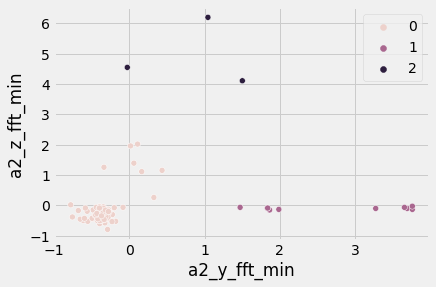

0.8025459028462989


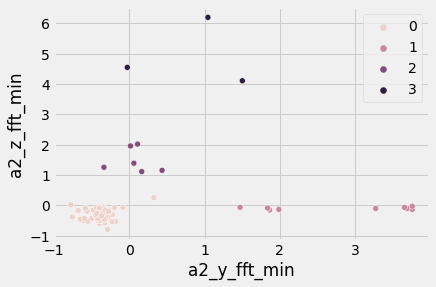

0.7362223896429395


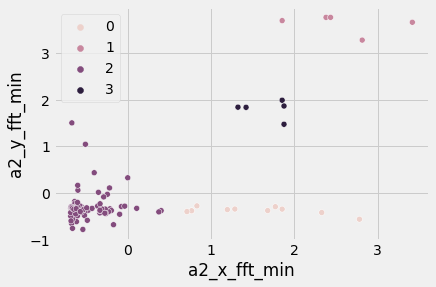

0.7339029071925466


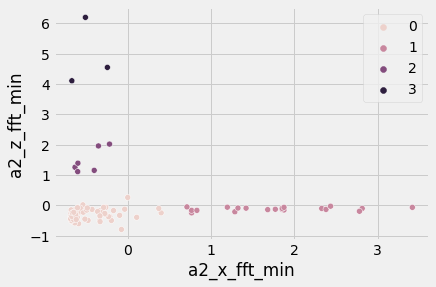

0.7258179352324623


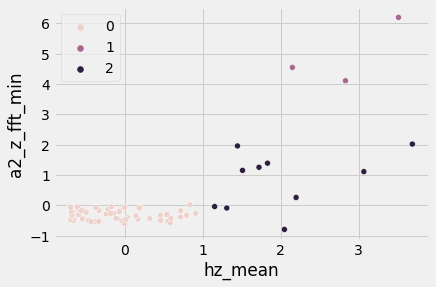

0.7212785859279915


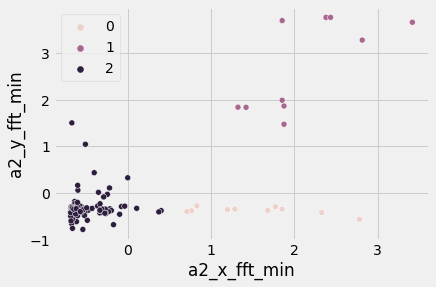

0.7206620416075283


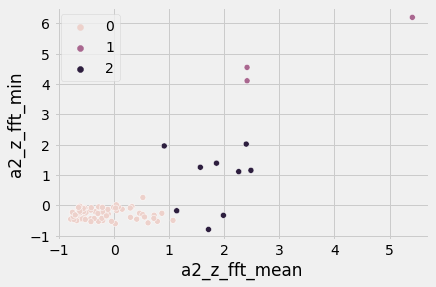

0.7195380464694051


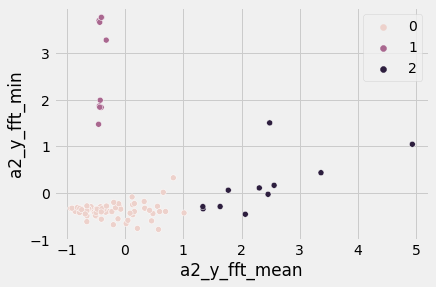

0.7172934296278666


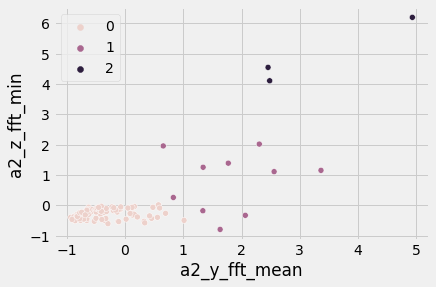

0.7124086646197275


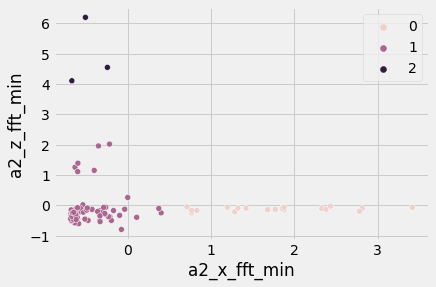

0.7099516184508856


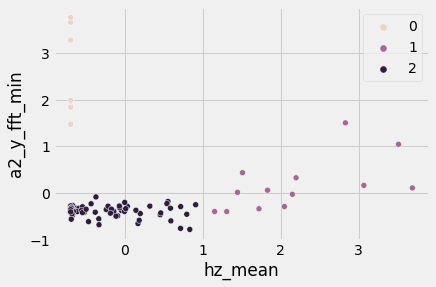

0.7073301686253005


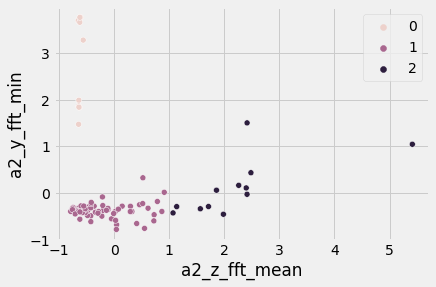

0.6869610050534216


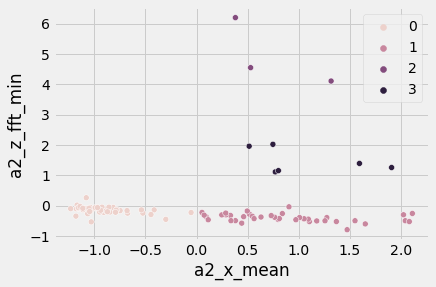

0.6724708379042081


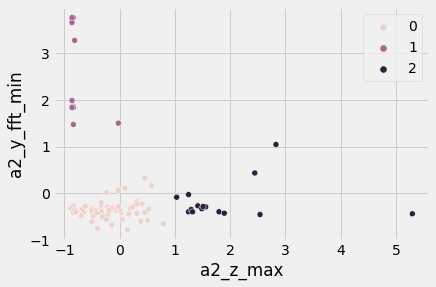

In [8]:
score_dict_keys = list(score_dict.keys())
score_dict_keys = sorted(score_dict_keys,reverse=True)
features_list = []
for key in score_dict_keys[0:50]:
    nr_clusters = score_dict[key][2]
    if nr_clusters >= 3:
        print(key)
        feature1 = score_dict[key][0]
        feature2 = score_dict[key][1]
        features_list.append(feature1)
        features_list.append(feature2)
        km = KMeans(random_state=42, n_clusters=nr_clusters)
        X = df_scaled[[feature1,feature2]]
        km.fit(X)
        sns.scatterplot(data=df_scaled, x=feature1, y=feature2, hue=km.labels_)
        plt.show()
# c = Counter(features_list)

In [9]:
# https://trello.com/b/czJSpr2F/challenge-clustering
# https://towardsdatascience.com/silhouette-method-better-than-elbow-method-to-find-optimal-clusters-378d62ff6891
# https://towardsdatascience.com/clustering-with-more-than-two-features-try-this-to-explain-your-findings-b053007d680a

For n_clusters = 2 The average silhouette_score is : 0.4706018762094421
For n_clusters = 3 The average silhouette_score is : 0.4980129793728963
For n_clusters = 4 The average silhouette_score is : 0.48364710245282105
For n_clusters = 5 The average silhouette_score is : 0.4725873672447731
For n_clusters = 6 The average silhouette_score is : 0.4618470544276678


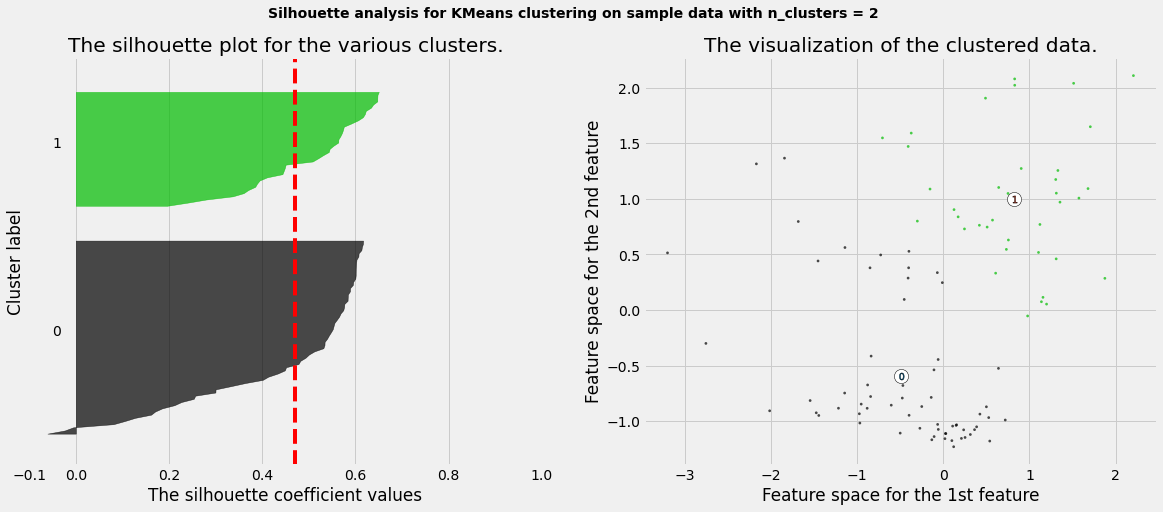

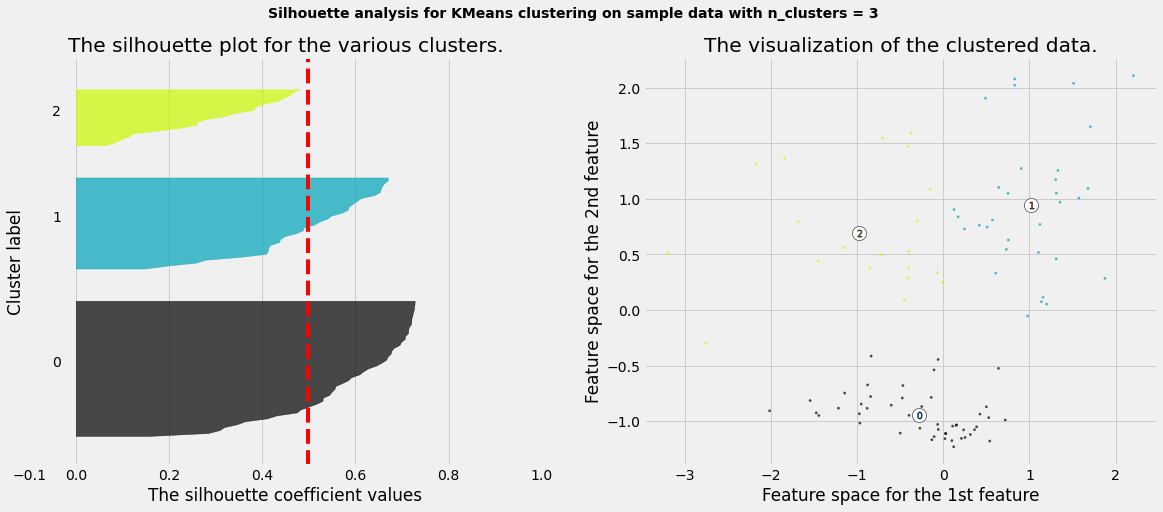

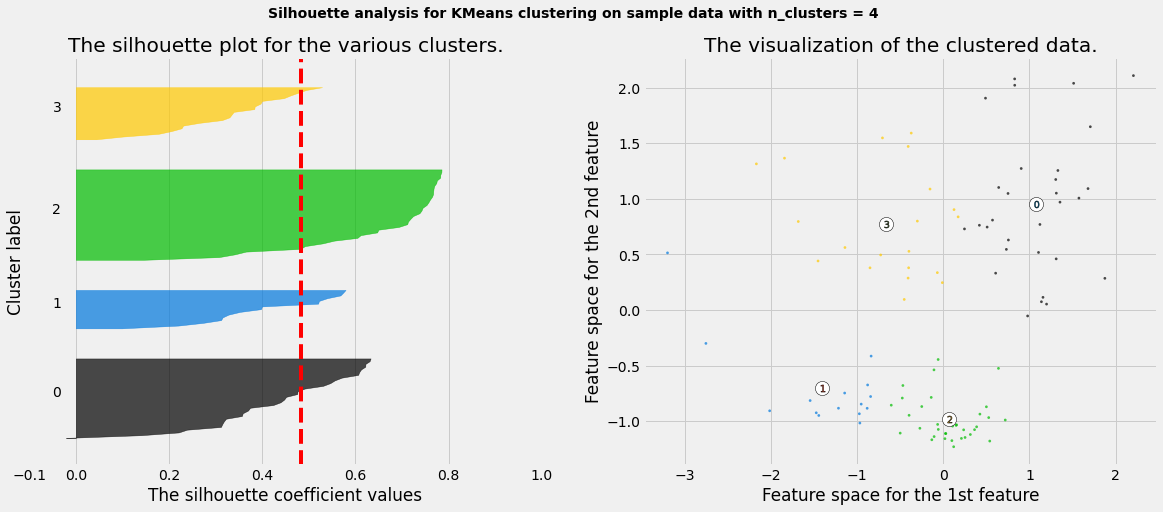

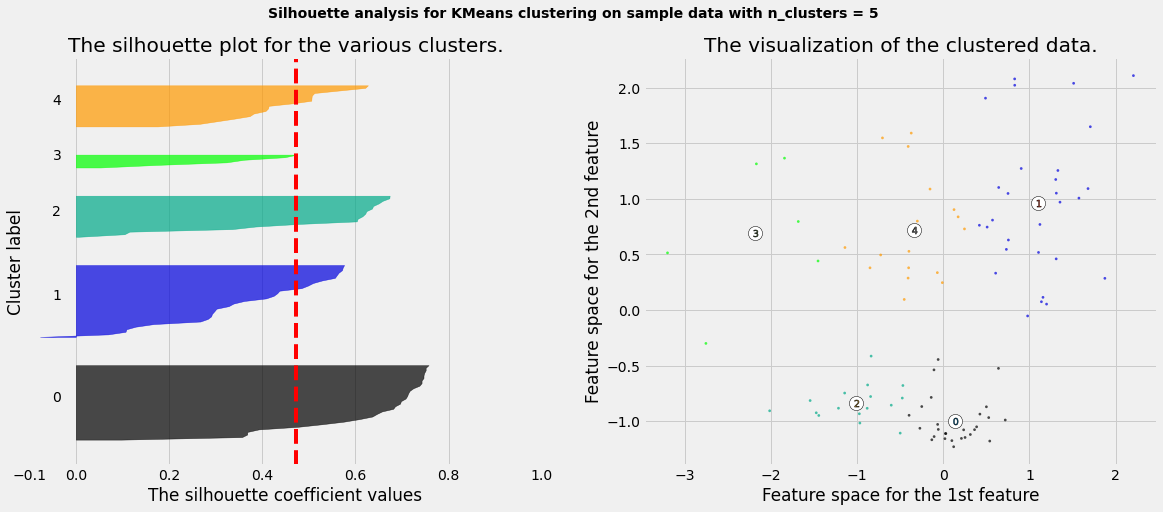

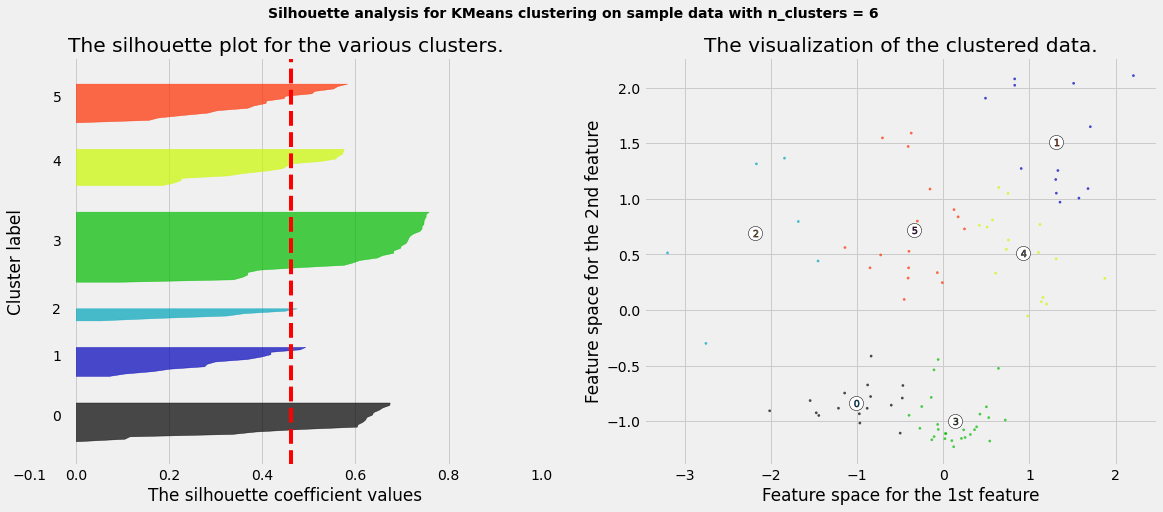

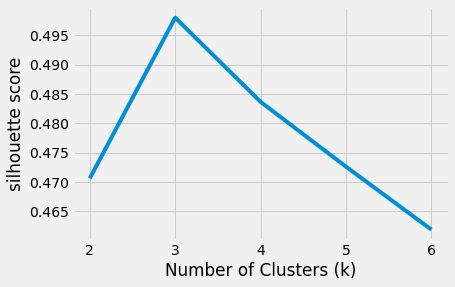

In [14]:
range_n_clusters = [2, 3, 4, 5,6]
silhouette_avg_n_clusters = []
X = df_scaled[["a2_y_mean","a2_x_mean"]].values
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=42,n_init=200)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    silhouette_avg_n_clusters.append(silhouette_avg)
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()


style.use("fivethirtyeight")
plt.plot(range_n_clusters, silhouette_avg_n_clusters)
plt.xlabel("Number of Clusters (k)")
plt.ylabel("silhouette score")
plt.savefig("Visuals/silhouette.png")
plt.show()